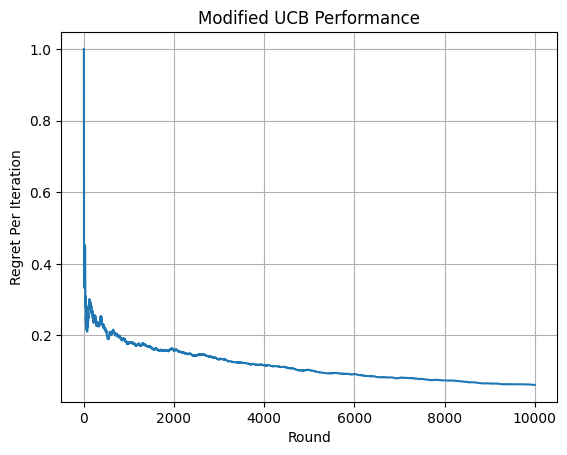

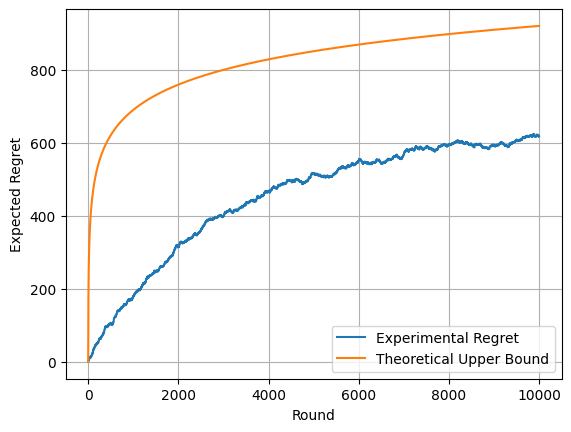

In [34]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

class ModifiedUCB:
  def __init__(self, num_user_types, num_articles, total_rounds):
    self.num_user_types = num_user_types
    self.num_articles = num_articles
    self.total_rounds = total_rounds
    self.article_counts = np.zeros((num_user_types, num_articles))  # A two-dimensional array containing the number of times each article has been shown to each user type
    self.article_rewards = np.zeros((num_user_types, num_articles))  # A two-dimensional array containing the cumulative reward of each article based on the user type
    self.ucb_values = np.zeros((num_user_types, num_articles))  # A two-dimensional array containing the UCB values of each article based on the user type

  def choose_article(self, user_type):
    for article in range(self.num_articles):
      if self.article_counts[user_type][article] == 0:  # If there is an article that has not yet been shown to the given user type, then return this
        return article
    return np.argmax(self.ucb_values[user_type])  # Return the article with the highest UCB value for the given user type

  def update(self, user_type, article, reward):
    self.article_counts[user_type][article] += 1  # Update the number of times the chosen article has been shown to the given user type
    self.article_rewards[user_type][article] += reward  # Update the cumulative reward of the chosen article for the given user type
    mean_reward = self.article_rewards[user_type][article] / self.article_counts[user_type][article]  # Calculate the mean reward of the chosen article for the given user type
    exploration_bonus = np.sqrt(2 * np.log(self.total_rounds) / self.article_counts[user_type][article])  # Calculate the exploration term of the UCB formula
    self.ucb_values[user_type][article] = mean_reward + exploration_bonus  # Update the UCB value of the chosen article for the given user type

num_user_types = 4
num_articles = 5  # K = 5 (arms)
total_rounds = 10000  # T = 10000 (horizon)
algo = ModifiedUCB(num_user_types, num_articles, total_rounds)  # Create an instance of the ModifiedUCB class
algo_reward = np.zeros(total_rounds)
best_reward = np.zeros(total_rounds)
expected_regret = np.zeros(total_rounds)
regret = np.zeros(total_rounds)
rounds = np.arange(1, total_rounds + 1)  # Create the x-axis values
click_probabilities = [[0.8, 0.6, 0.5, 0.4, 0.2],  # Female over 25
                       [0.2, 0.4, 0.5, 0.6, 0.8],  # Male over 25
                       [0.2, 0.4, 0.8, 0.6, 0.5],  # Female under 25
                       [0.2, 0.4, 0.8, 0.6, 0.5]]  # Male under 25 (same as female)

for i in range(total_rounds):
  user_type = np.random.randint(num_user_types)  # Choose a random type of user with equal probability
  article = algo.choose_article(user_type)  # Choose an article using the modified UCB algorithm
  reward = np.random.binomial(1, click_probabilities[user_type][article])  # Get a reward based on the article the algorithm selected for the user
  algo.update(user_type, article, reward)  # Update UCB algorithm data

  if i > 0: algo_reward[i] = algo_reward[i-1] + reward  # Array keeping track of cumulative UCB reward
  else: algo_reward[i] = reward
  if i > 0: best_reward[i] = best_reward[i-1] + np.random.binomial(1, 0.8)  # Array keeping track of t * optimal reward (cumulative reward)
  else: best_reward[i] = np.random.binomial(1, 0.8)
  expected_regret[i] = best_reward[i] - algo_reward[i]  # Εxpected regret at round t
  regret[i] = expected_regret[i] / (i + 1)  # Regret per iteration at round t

plt.figure()
plt.title("Modified UCB Performance")
plt.xlabel("Round")
plt.ylabel("Regret Per Iteration")
plt.grid(True)
plt.plot(rounds, regret)

plt.figure()
plt.xlabel("Round")
plt.ylabel("Εxpected Regret")
plt.grid(True)
plt.plot(rounds, expected_regret, label='Experimental Regret')
plt.plot(rounds, 100 * np.log(rounds), label='Theoretical Upper Bound')
plt.legend()

plt.show()
